This project aims to predict customer churn using various ML models and chooses the best out of them

Next Step: Import modules and data

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [123]:
data = pd.read_csv("cust_data.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The above data shows that the datatypes and it seems to be proper for the data it holds

Next step : Check the null and duplicate data

In [125]:
numeric_features = ['Age', 'Tenure', 'EstimatedSalary']
categorical_features = ['Geography','Gender']
binary_features = ['HasCrCard','IsActiveMember']

In [126]:
print("--Null rows--")
print(data.isnull().sum())
print("--Duplicate rows rows--")
print(data.duplicated().sum())

--Null rows--
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
--Duplicate rows rows--
0


# Exploratory Data Analysis

In this step we find out if the data is skewed, class imbalance, relationship between features and output 

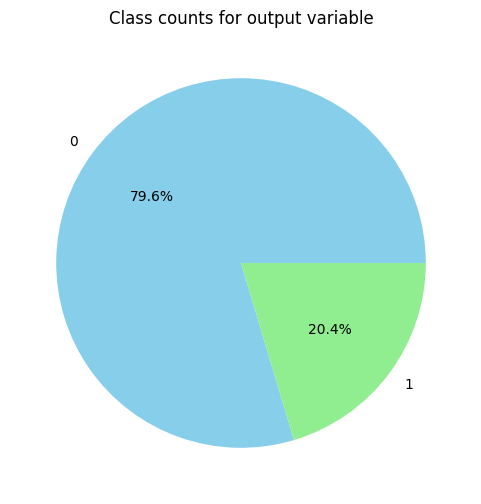

In [127]:
plt.figure(figsize=(6,6))
counts = data.Exited.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Class counts for output variable')
plt.show()

The targer column seems to be imbalanced as customer churn is nearly 20%. This tells us that accuracy might not be the right metric and we need to use class imbalance ratio while tuning the ML models or use balancing techniques like SMOTE

Plots for Categorical Features vs the output expected value


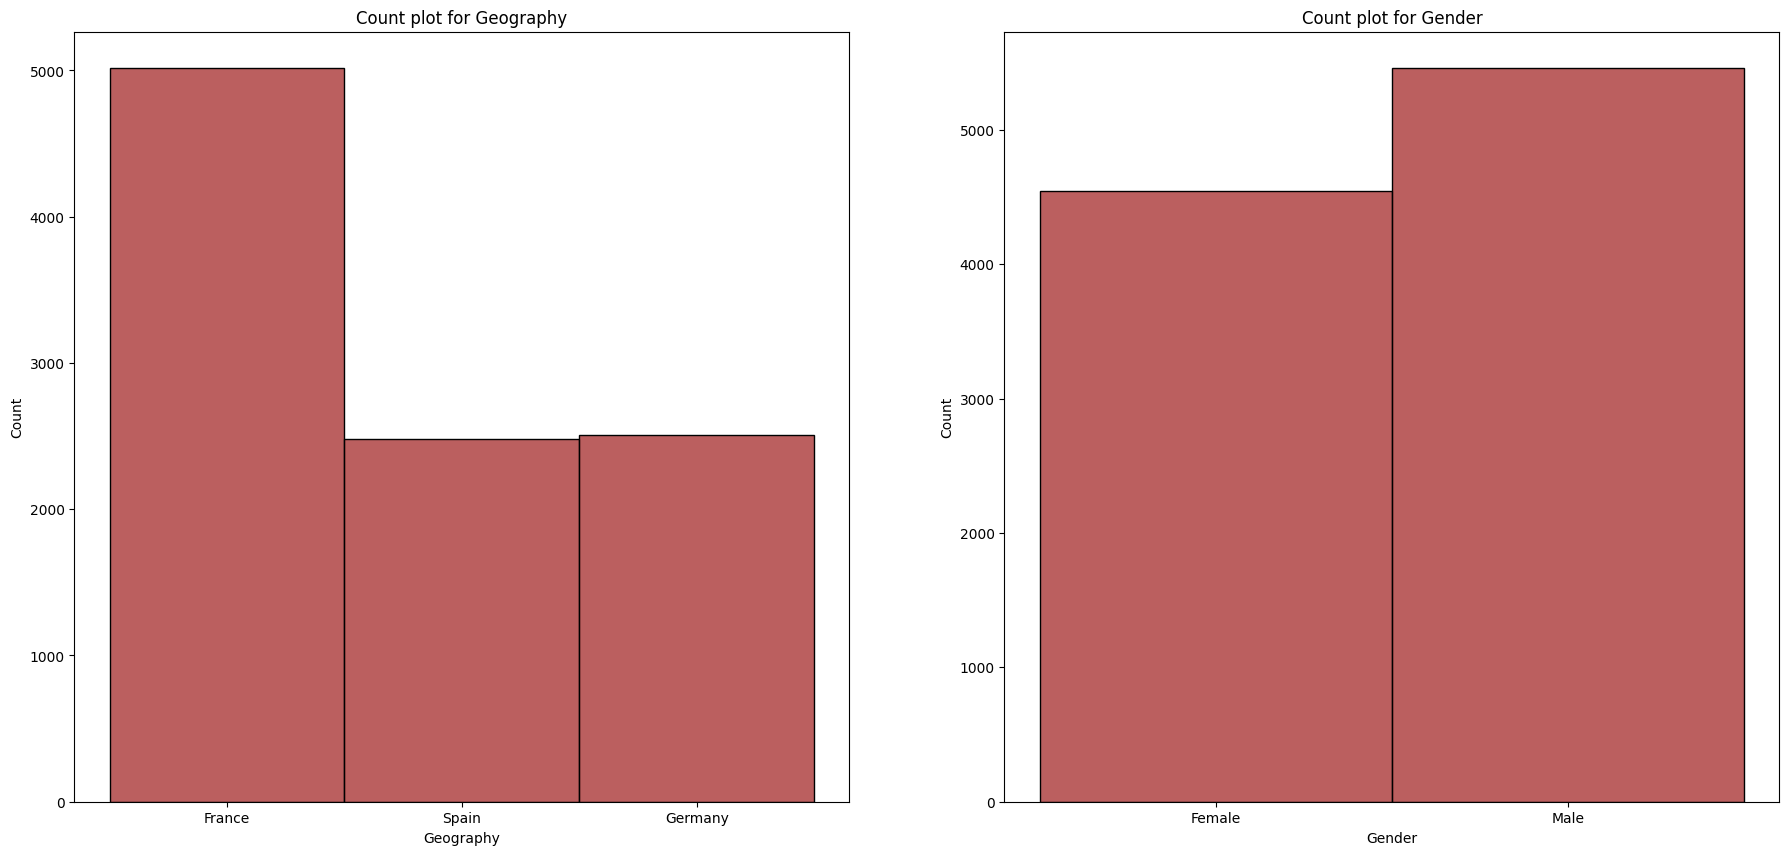

In [128]:
print("Plots for Categorical Features vs the output expected value")
plt.figure(figsize=(22,22))
for i, col in enumerate(categorical_features):
    plt.subplot(2,2, i+1)
    sns.histplot(x=data[col], data=data, color="brown")
    plt.title(f"Count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.show()

- The histogram shows that customer base distribution is nearly balanced on gender and isActiveMember.
- The HasCrCard and country distribution is not

More analysis is required to find any correlation with respect to the output variable


Relationship between variables independently on the Exited column


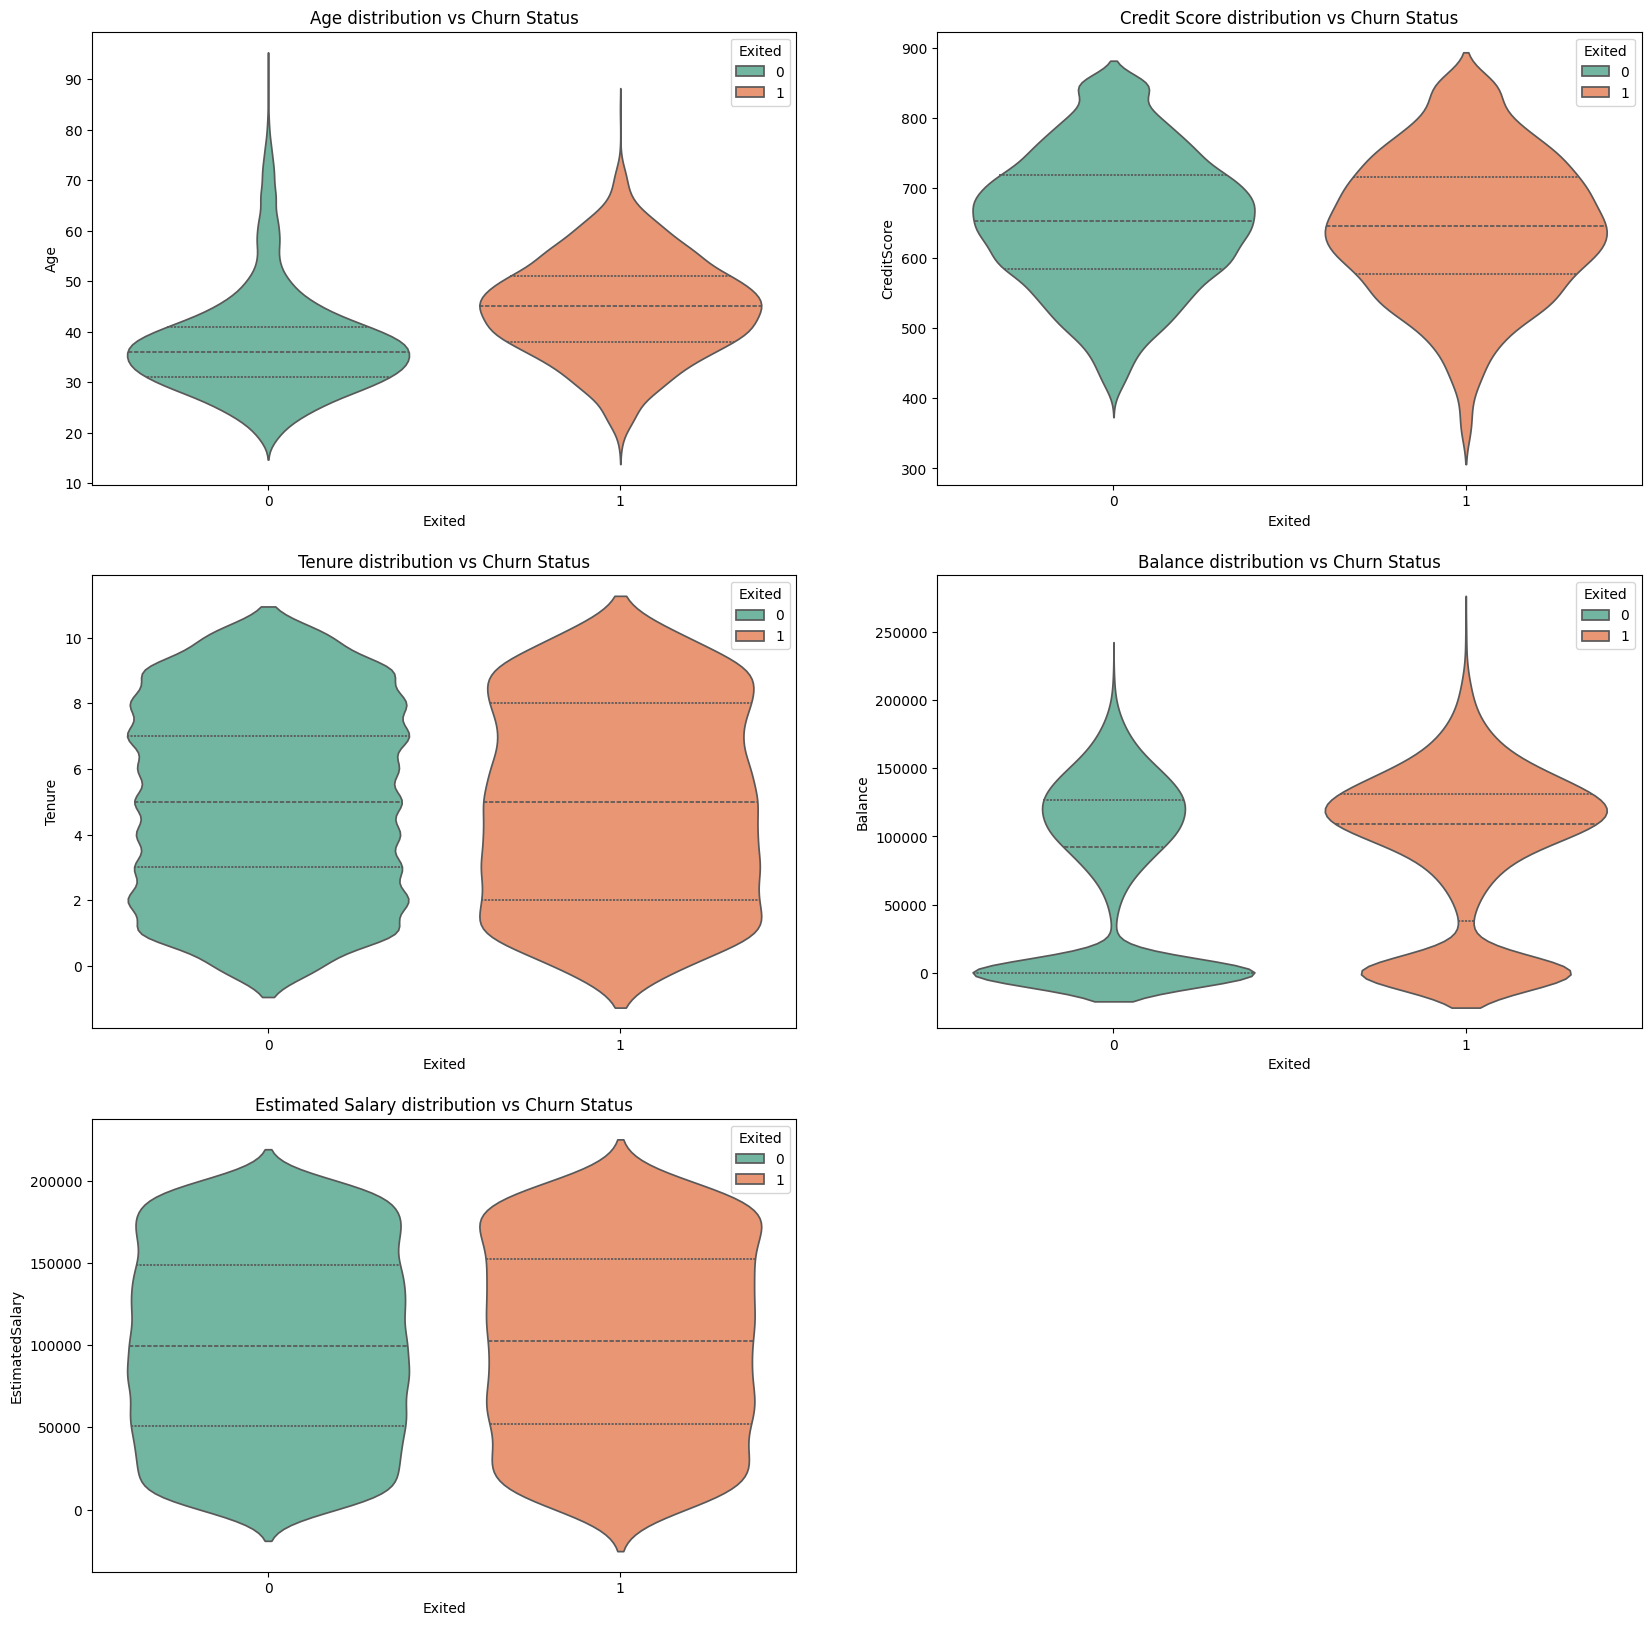

In [129]:
print("Relationship between variables independently on the Exited column")

fig, axes = plt.subplots(3,2,figsize = (20,20))

sns.violinplot(data=data, x='Exited', y='Age', palette='Set2', ax=axes[0,0], inner="quart", hue='Exited')
axes[0,0].set_title("Age distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='CreditScore' ,palette='Set2', ax=axes[0,1], inner="quart", hue='Exited')
axes[0,1].set_title("Credit Score distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='Tenure', palette='Set2', ax=axes[1,0], inner="quart", hue='Exited')
axes[1,0].set_title("Tenure distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='Balance', palette='Set2', ax=axes[1,1], inner="quart", hue='Exited')
axes[1,1].set_title("Balance distribution vs Churn Status")
sns.violinplot(data=data, x='Exited', y='EstimatedSalary', palette='Set2', ax=axes[2,0], inner="quart", hue='Exited')
axes[2,0].set_title("Estimated Salary distribution vs Churn Status")

axes[2,1].axis('off')
plt.show()


- The credit score distribution seems almost similar indicating it might not be a strong predictor
- The Age shows that older people tend to churn more than younger
- The Tenure qurantile suggests that people with shorter tenure tend to churn more than the people with longer tenure
- The balance plot shows customer with higher balance churn most on average. 
- The estimated salary is similar and does not suggest that salary is main feature predicting the churn 

Plot for numerical features


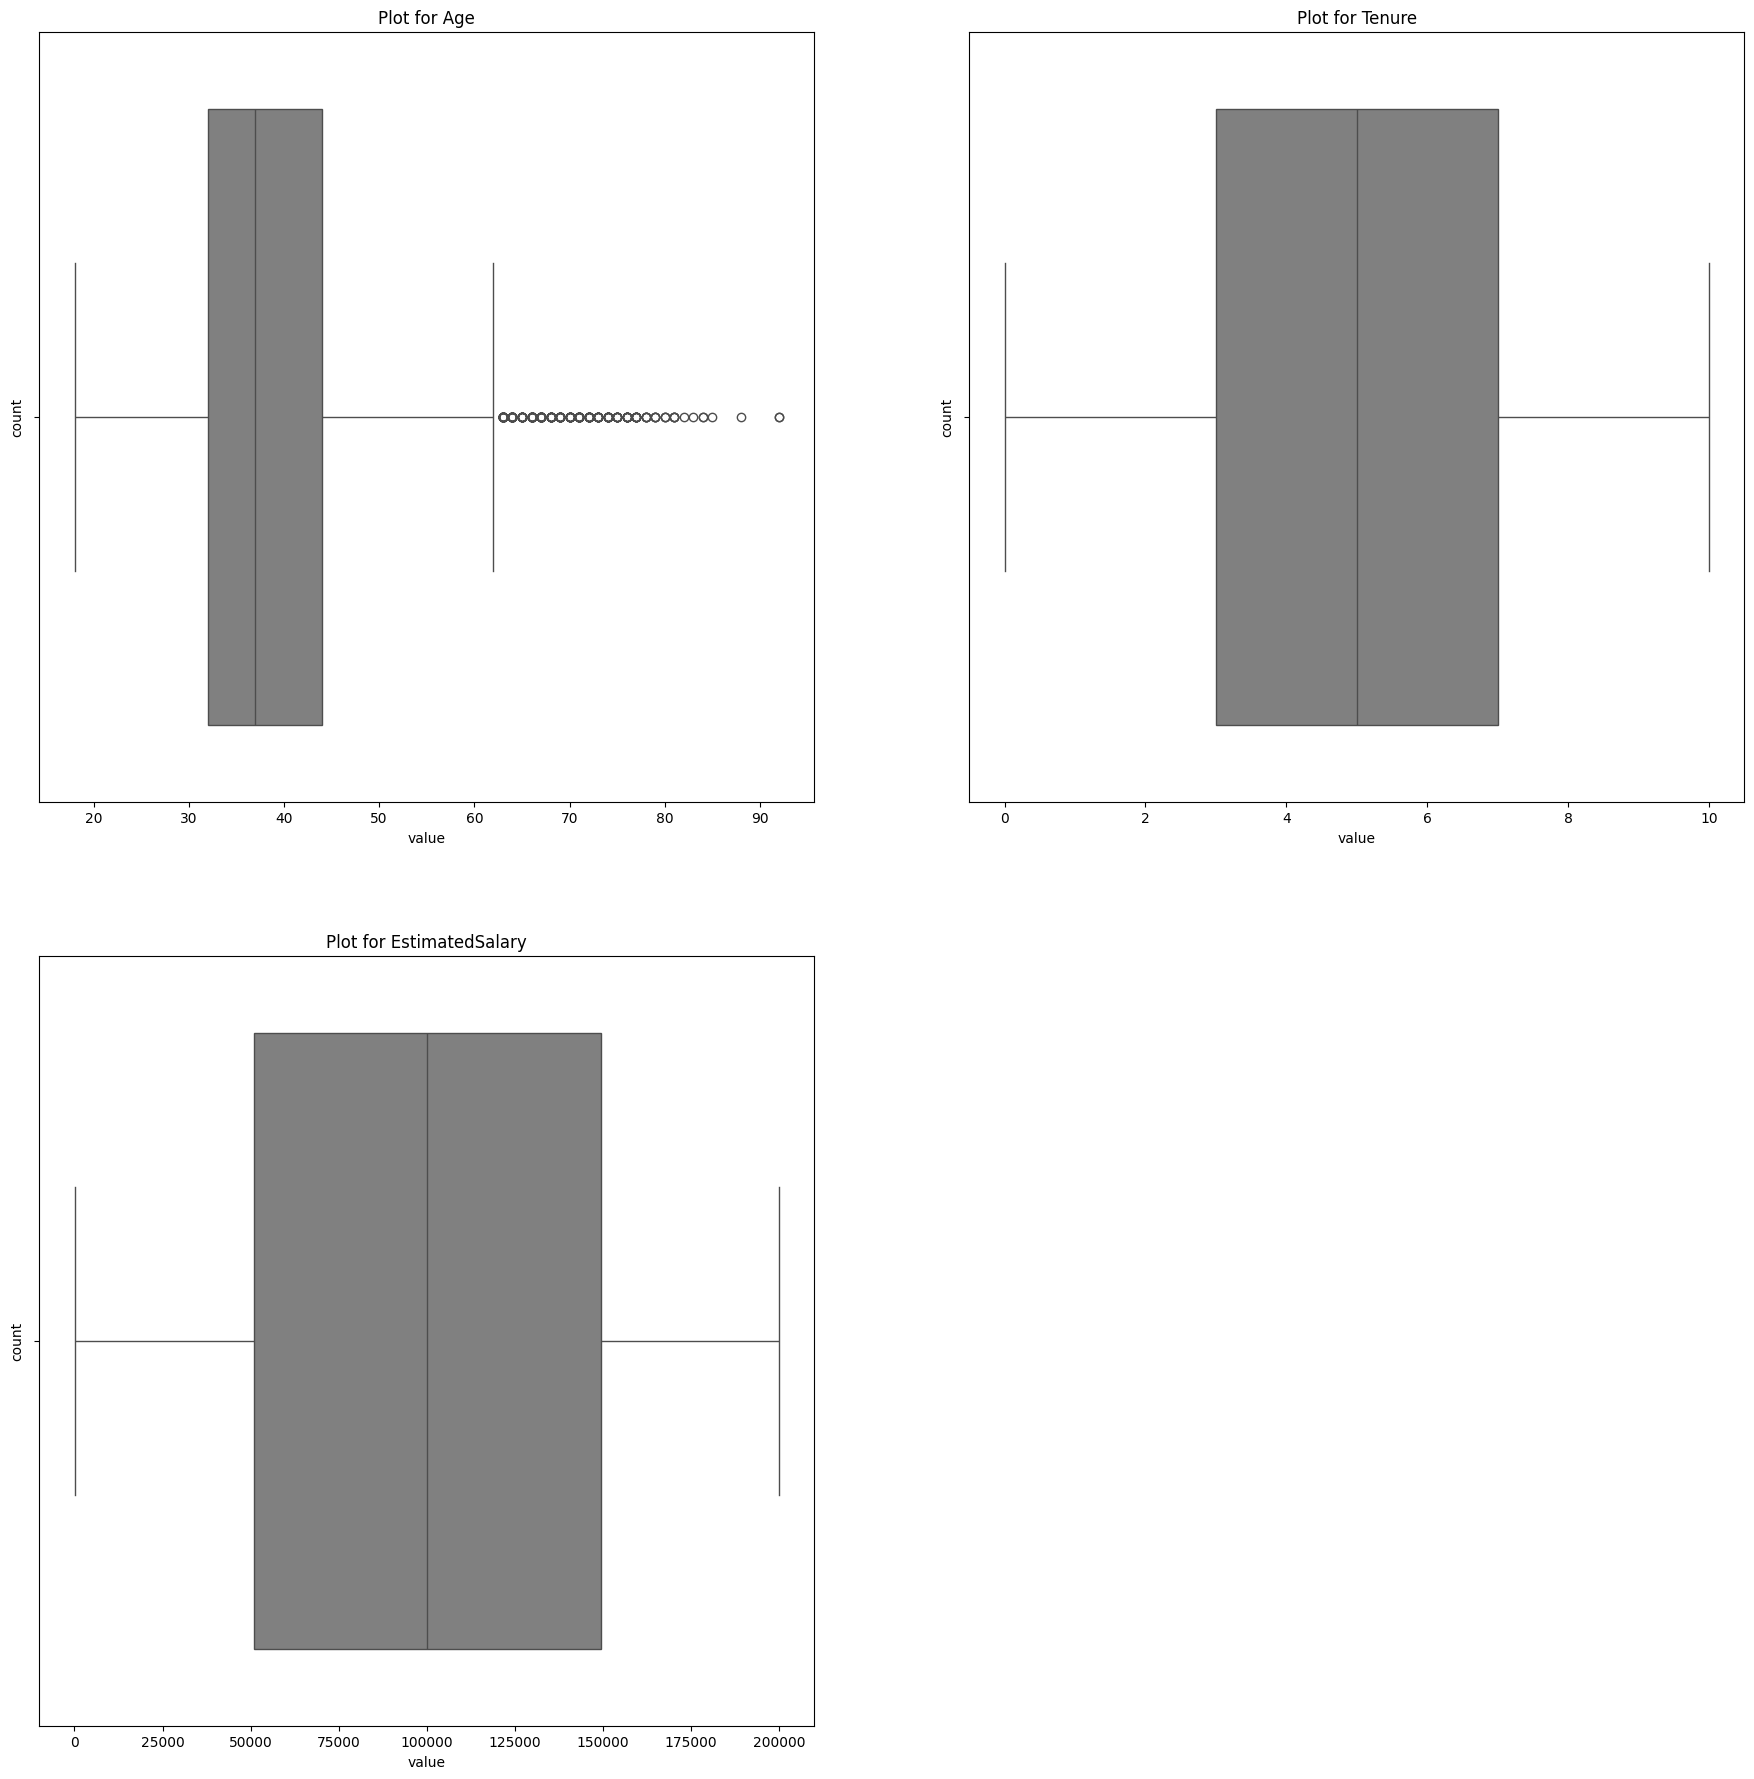

In [130]:
print("Plot for numerical features")
plt.figure(figsize=(22,22))
for i, col in enumerate(numeric_features):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=data[col], color="grey")
    plt.title(f"Plot for {col}")
    plt.xlabel('value')
    plt.ylabel("count")

- The plots above show that Age has some outliers, However, this is okay as we are targetting people across age groups
- The other numerical features shows no outliers

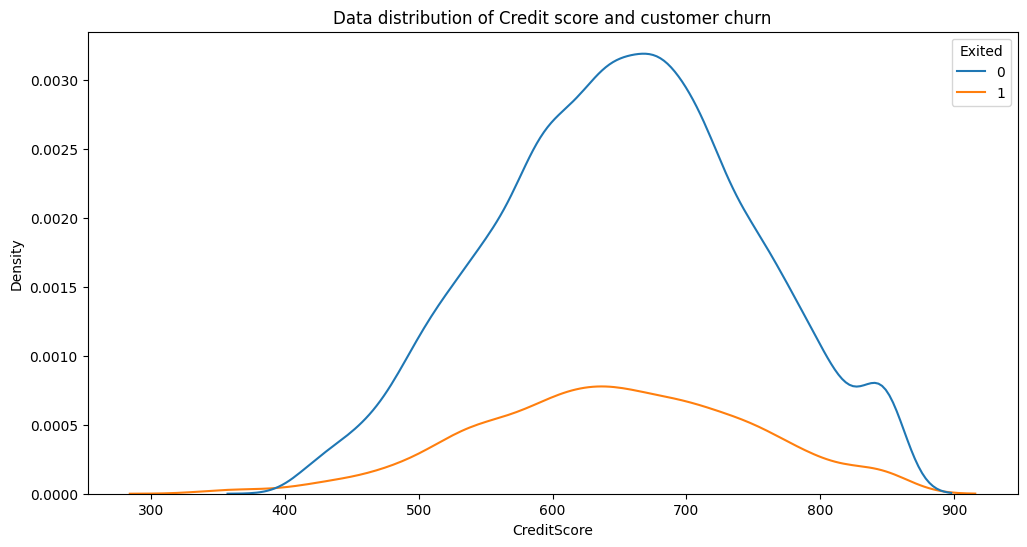

In [131]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=data, x='CreditScore', hue='Exited')
plt.title("Data distribution of Credit score and customer churn")
plt.show()

- The graph shows that customer churn distribution follows similar pattern except that class is imbalanced. This shows that credit score is not a direct predictor for churn

In [132]:
bins = [18, 22, 50, 60, 1000] 
labels = ['18-22', '22-50', '50-60', '>60']

data['AgeGroup'] = pd.cut(data.Age, bins=bins, labels=labels, right=False, include_lowest=True)


In [133]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,22-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,22-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,22-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,22-50
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,22-50


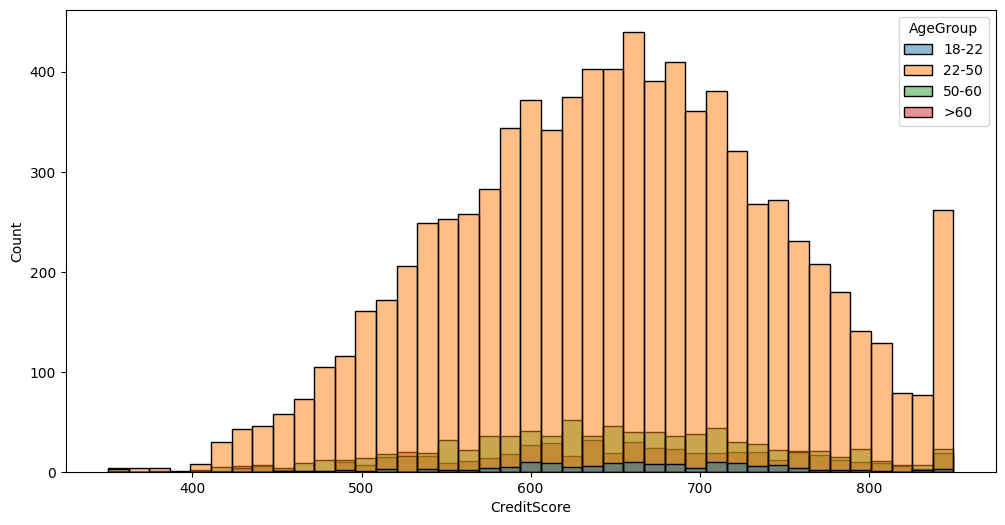

In [134]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='CreditScore', hue='AgeGroup')
plt.show()

- This show that Age between 18-22 makes up small fraction of whole customers and also mostly lower credit score
- The age group between 22-50 makes up most of the customer and the credit score is averaged
- The age group between 50-60 has a good range of credit score
- The customer above 60 have lower credit score

Customer Age group vs the Exited column


<Axes: xlabel='AgeGroup', ylabel='Count'>

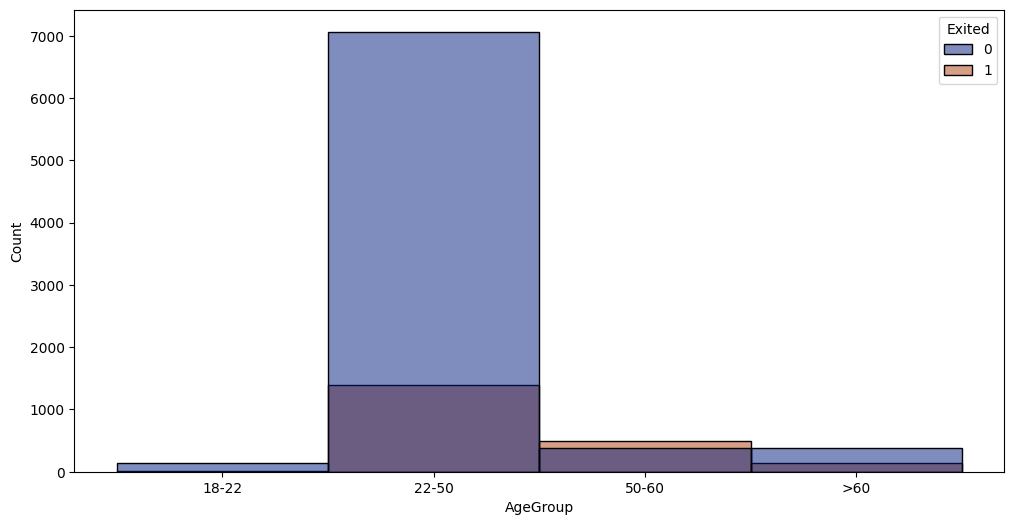

In [135]:
plt.figure(figsize=(12,6))

print("Customer Age group vs the Exited column")
sns.histplot(data=data, x='AgeGroup', hue='Exited', palette="dark")

- This adds to above findings that the majority of customer base is between 22-50 years of age
- Also, older customers are risk of higher churn   

Checking the correlation between the numerical features and also some features. Adding new features like credit score, 

In [136]:
# Check how credit utilisation is per customer
data['CreditUtilisation']=data.Balance/data.CreditScore
# Balance to salary ratio to understand the balance is impacted to salary
data['BalanceToSalaryRatio']=data.Balance/data.EstimatedSalary
# How credit score impacts with Age. This helps to understand if credit score differs with age
data['CreditScoreAgeInteraction']=data.CreditScore*data.Age

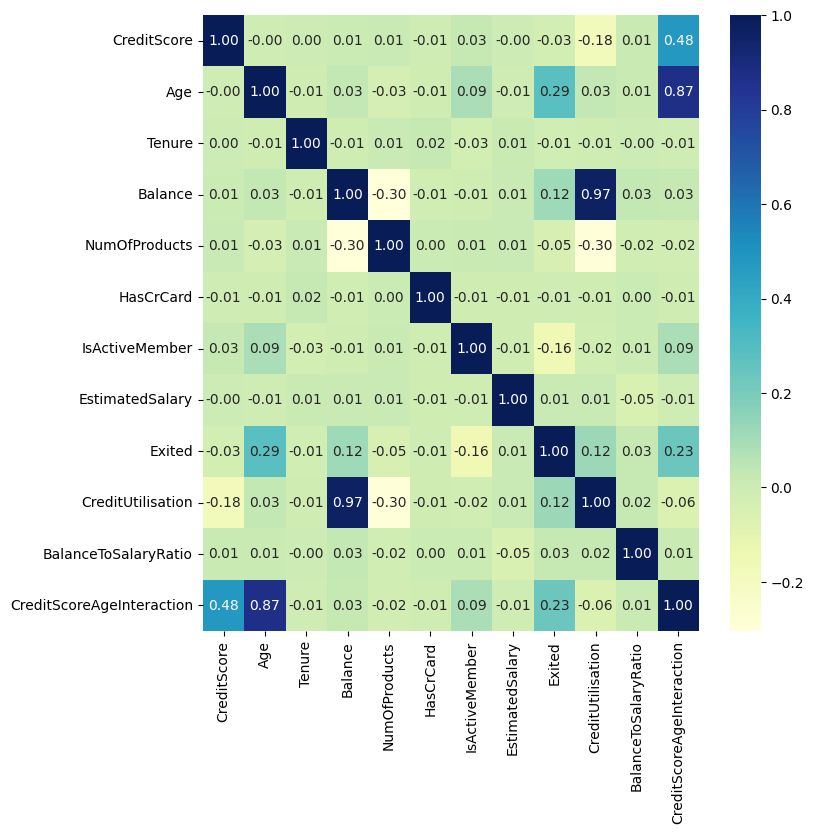

In [138]:
data.head()
plt.figure(figsize = (8,8))
sns.heatmap(data.drop(['RowNumber','CustomerId', 'AgeGroup', 'Surname', 'Gender', 'Geography'],axis=1).corr(), annot=True, fmt='.2f',cmap='YlGnBu')
plt.show()

- Moderate positive relationship between Age and Exited, again confirming above findings
- Balance and CreditUtilisation shows strong positive relationship 
- CreditScoreInteraction and CreditUtilisation also shows moderate relationship to Exited
- isActiveMember has a negative correlation indicating active members are less likely to churn  

In [139]:
bins = [0,700,750,1000]
labels = ['Low', 'Medium', 'High']

data['CreditScoreGroup'] = pd.cut(data.CreditScore, bins=bins, labels=labels, right=False, include_lowest=True)

In [140]:
categorical_features.extend(['AgeGroup', 'CreditScoreGroup'])

In [141]:
categorical_features

['Geography', 'Gender', 'AgeGroup', 'CreditScoreGroup']

In [142]:
col_dropped = ['Exited', 'RowNumber', 'CustomerId', 'Surname']
X = data.drop(col_dropped, axis =1)
y = data.Exited

ML Trainig, Tuning and Testing

All imports for machine learning training

In [143]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, 
                             RocCurveDisplay, precision_score, recall_score, f1_score,
                             average_precision_score, classification_report)

from sklearn.linear_model import LogisticRegression

In [144]:
X_tune, X_test, y_tune, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tune,y_tune, test_size=0.2, stratify=y_tune, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)


(6400, 15) (1600, 15) (2000, 15)
(6400,) (1600,) (2000,)


In [145]:
numeric_preprocess = Pipeline(steps=[
    ("scaler", StandardScaler())
])
data_processor = ColumnTransformer(
    transformers=[
        ('num', numeric_preprocess, numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

In [146]:
lr_pl = Pipeline([
    ("preprocessor", data_processor),
    ("classifier", LogisticRegression(penalty='l1', 
                                          solver='liblinear', 
                                          max_iter=1000, 
                                          random_state=42,
                                          class_weight='balanced'
))
])

In [147]:
lr_pl.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [148]:
y_pred = lr_pl.predict(X_val)
y_proba = lr_pl.predict_proba(X_val)[:,1]

Logistic Regression  —  Acc: 0.721 | AUC: 0.777


<Figure size 640x480 with 0 Axes>

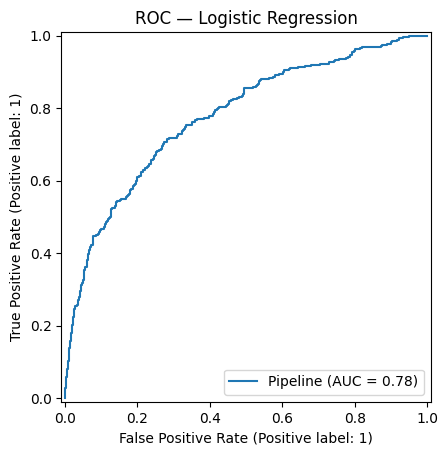

<Figure size 640x480 with 0 Axes>

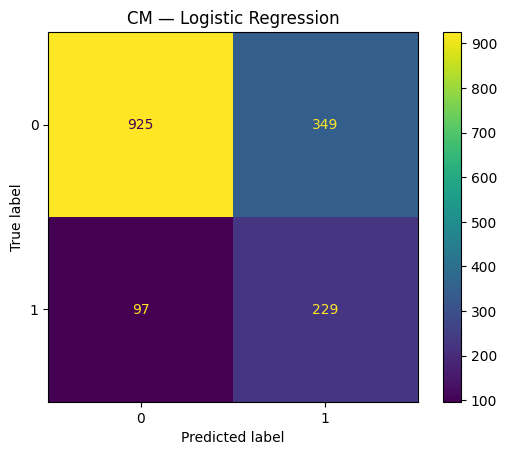


===== BASELINE MODEL ON VALIDATION FOR LOGISTIC REGRESSION =====
Accuracy: 0.72125
Precision (YES): 0.3961937716262976
Recall (YES): 0.7024539877300614
F1-score: 0.5066371681415929
ROC AUC: 0.7765985110419816
PR AUC: 0.5189338562958608

Confusion Matrix:
 [[925 349]
 [ 97 229]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1274
           1       0.40      0.70      0.51       326

    accuracy                           0.72      1600
   macro avg       0.65      0.71      0.66      1600
weighted avg       0.80      0.72      0.74      1600



In [149]:
print(f"Logistic Regression  —  Acc: {accuracy_score(y_val, y_pred):.3f} | AUC: {roc_auc_score(y_val, y_proba):.3f}")
fig = plt.figure(); RocCurveDisplay.from_estimator(lr_pl, X_val, y_val); plt.title("ROC — Logistic Regression"); plt.show()
fig = plt.figure(); ConfusionMatrixDisplay.from_predictions(y_val, y_pred); plt.title("CM — Logistic Regression"); plt.show()

print("\n===== BASELINE MODEL ON VALIDATION FOR LOGISTIC REGRESSION =====")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision (YES):", precision_score(y_val, y_pred, pos_label=1))
print("Recall (YES):", recall_score(y_val, y_pred, pos_label=1))
print("F1-score:", f1_score(y_val, y_pred, pos_label=1))
print("ROC AUC:", roc_auc_score(y_val, y_proba))
print("PR AUC:", average_precision_score(y_val, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

In [150]:
param_grid = [
    {'classifier__penalty': ['l1', 'l2'], 
    'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0], 
    'classifier__solver': ['liblinear'],
    'classifier__class_weight':['balanced', {0:1,1:2},{0:1,1:3}]},
]
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [151]:
grid_search = GridSearchCV(
    lr_pl, 
    param_grid, 
    cv=cv, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1
)


In [152]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


,estimator,Pipeline(step...liblinear'))])
,param_grid,"[{'classifier__C': [0.01, 0.1, ...], 'classifier__class_weight': ['balanced', {0: 1, 1: 2}, ...], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear']}]"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [153]:
print(f"Best Penalty: {grid_search.best_params_['classifier__penalty']}")
print(f"Best C value: {grid_search.best_params_['classifier__C']}")
print(f"Best cross-validation score (accuracy): {grid_search.best_score_:.4f}")
print(f"Best class weights: {grid_search.best_params_['classifier__class_weight']}")


Best Penalty: l2
Best C value: 0.1
Best cross-validation score (accuracy): 0.5068
Best class weights: {0: 1, 1: 3}


In [154]:
best_model = grid_search.best_estimator_
best_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('num',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    ['Age', 'Tenure', 'EstimatedSalary']),
                                   ('cat', OneHotEncoder(drop='first'),
                                    ['Geography', 'Gender', 'AgeGroup',
                                     'CreditScoreGroup'])])),
  ('classifier',
   LogisticRegression(C=0.1, class_weight={0: 1, 1: 3}, max_iter=1000,
                      random_state=42, solver='liblinear'))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('num',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['Age', 'Tenure', 'EstimatedSalary']),
                                 ('cat', OneHotEnc

In [155]:
y_pred_ht = best_model.predict(X_val)
y_proba_ht = best_model.predict_proba(X_val)[:,1]

Logistic Regression  —  Acc: 0.759 | AUC: 0.774


<Figure size 640x480 with 0 Axes>

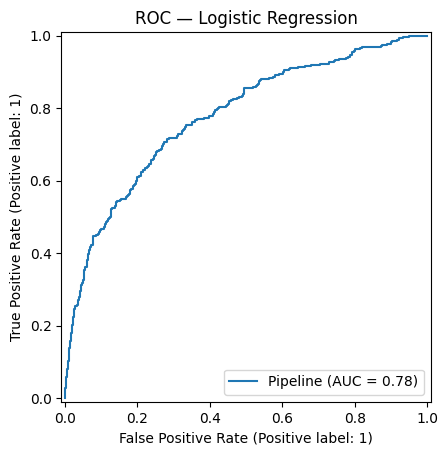

<Figure size 640x480 with 0 Axes>

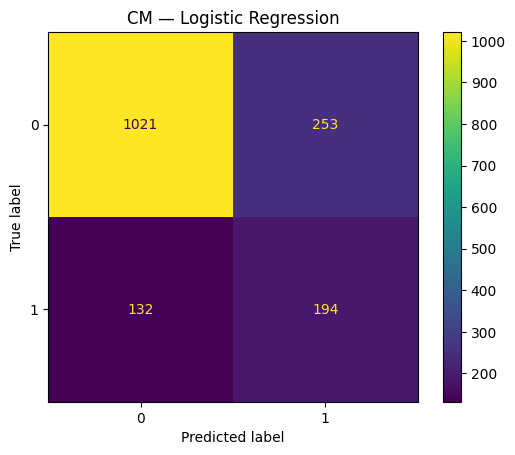


===== HYPERPARAMETERISED MODEL ON VALIDATION =====
Accuracy: 0.759375
Precision (YES): 0.43400447427293065
Recall (YES): 0.5950920245398773
F1-score: 0.5019404915912031
ROC AUC: 0.7742605772842407
PR AUC: 0.5112040978425104

Confusion Matrix:
 [[1021  253]
 [ 132  194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1274
           1       0.43      0.60      0.50       326

    accuracy                           0.76      1600
   macro avg       0.66      0.70      0.67      1600
weighted avg       0.79      0.76      0.77      1600



In [156]:
print(f"Logistic Regression  —  Acc: {accuracy_score(y_val, y_pred_ht):.3f} | AUC: {roc_auc_score(y_val, y_proba_ht):.3f}")
fig = plt.figure(); RocCurveDisplay.from_estimator(lr_pl, X_val, y_val); plt.title("ROC — Logistic Regression"); plt.show()
fig = plt.figure(); ConfusionMatrixDisplay.from_predictions(y_val, y_pred_ht); plt.title("CM — Logistic Regression"); plt.show()

print("\n===== HYPERPARAMETERISED MODEL ON VALIDATION =====")
print("Accuracy:", accuracy_score(y_val, y_pred_ht))
print("Precision (YES):", precision_score(y_val, y_pred_ht, pos_label=1))
print("Recall (YES):", recall_score(y_val, y_pred_ht, pos_label=1))
print("F1-score:", f1_score(y_val, y_pred_ht, pos_label=1))
print("ROC AUC:", roc_auc_score(y_val, y_proba_ht))
print("PR AUC:", average_precision_score(y_val, y_proba_ht))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_ht))
print("\nClassification Report:\n", classification_report(y_val, y_pred_ht))